#### Imports

In [1]:
from dredFISH.Analysis.TissueGraph import *
from dredFISH.Visualization.Viz import *

from MERFISH_Objects.FISHData import *

from sklearn.preprocessing import normalize

import matplotlib.pyplot as plt 

#### Load data

#### Build layers 1-2: cells and zones

In [2]:
TMG = TissueMultiGraph('TMG_dev7.pkl')
topics = np.load('topics.npy')
TMG.Layers=TMG.Layers[0:2]

In [3]:
unq,ix = np.unique(topics,return_inverse=True)
id = np.arange(len(unq))
topics = id[ix]

#### Build layers 3: regions

In [4]:
%%time
# topics = TMG.find_topics(use_parallel=True)
TMG.create_neighborood_layer(topics)



CPU times: user 5.44 s, sys: 608 ms, total: 6.05 s
Wall time: 5.51 s


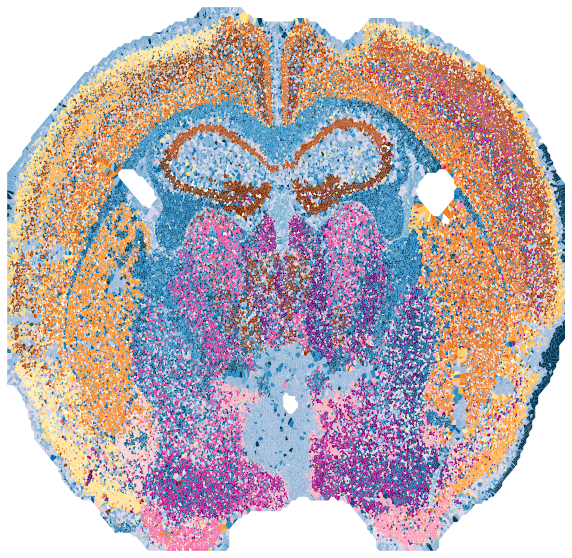

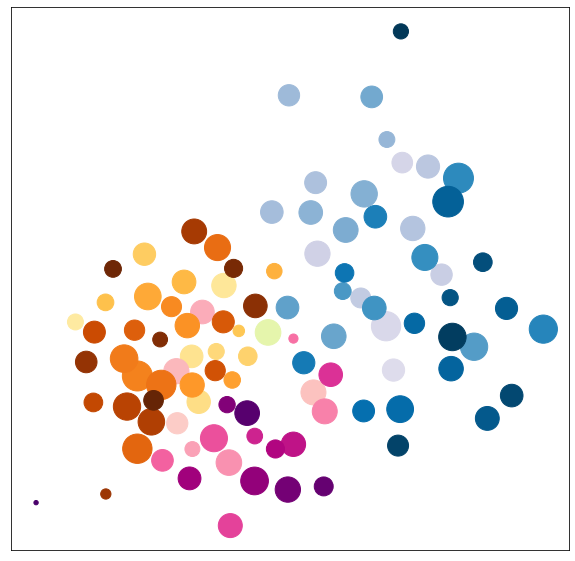

In [5]:
Vcellmap = CellMap(TMG)
Vcellmap.figsize = (10,10)
Vcellmap.cmap_list = ['YlOrBr','RdPu','PuBu','YlGn']
Vcellmap.set_view()
Vcellmap.plot()

In [9]:
TMG.Layers[2].calc_type2(n_cls=4)

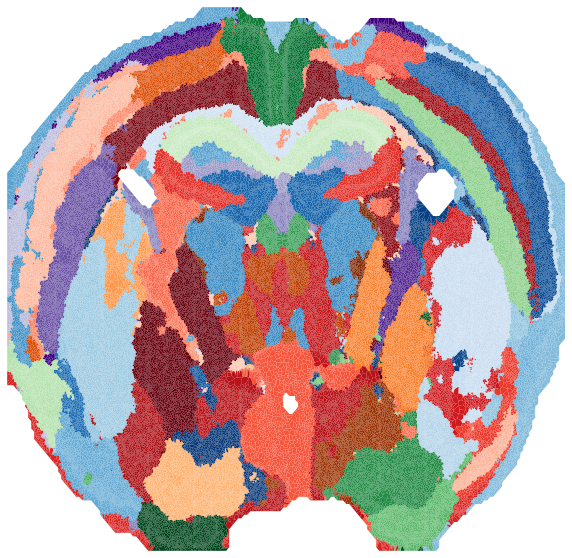

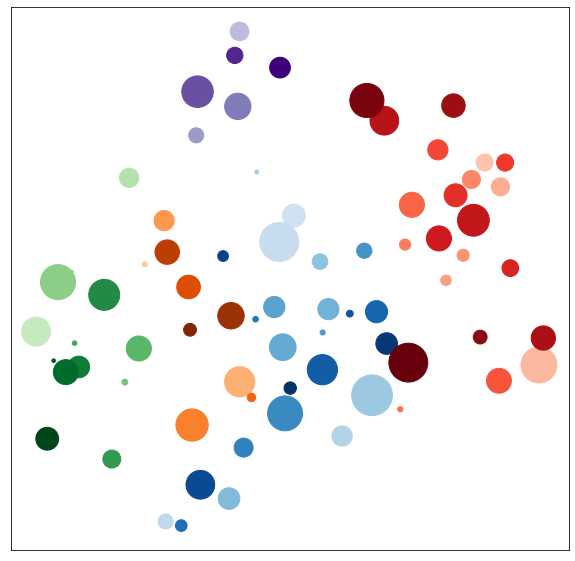

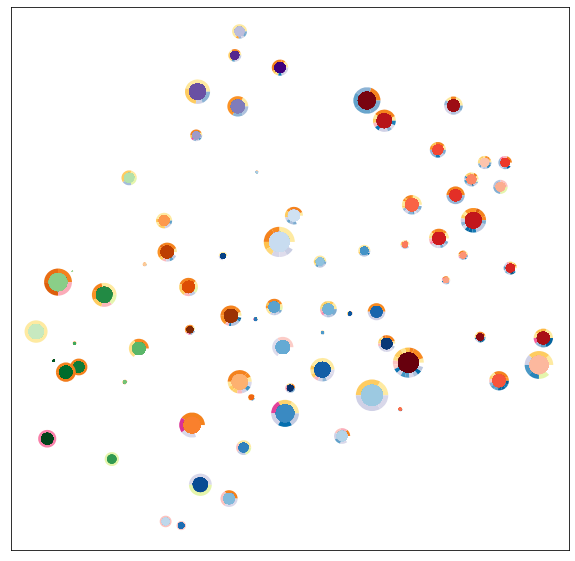

In [10]:
Vneighborhood = NeighborhoodMap(TMG)
Vneighborhood.figsize = (10,10)
Vneighborhood.cmap_list = ['Purples','Blues','Oranges','Reds','Greens']
Vneighborhood.set_view()
Vneighborhood.plot(Vcellmap)

In [9]:
pth='/home/rwollman/MyProjects/MaximallyInformativeBiocartography/FigForSlides/'
Vneighborhood
Vneighborhood.figs[0].savefig(pth + 'RegionMap.png')
Vneighborhood.figs[1].savefig(pth + 'RegionTypeScatter.png')
Vneighborhood.figs[2].savefig(pth + 'RegionTypeScatterWithPies.png')

In [10]:
Vcellmap.figs[0].savefig(pth + 'CellMap.png')

In [23]:
TMG = TissueMultiGraph('TMG_dev9.pkl')

In [24]:
TMG.N

[97786, 53171, 821]

In [25]:
TMG.fill_holes(2,10)

In [26]:
TMG.N

[97786, 53171, 660]

In [13]:
TMG.Ntypes

[102, 102, 73]

In [8]:
TMG.N

[97786, 53171, 658]

In [11]:
len(np.unique(TMG.Layers[2].Type))

73

In [12]:
TMG.Layers[2].Type.max()

72

In [18]:
Dsqr = TMG.Layers[2].Dtype

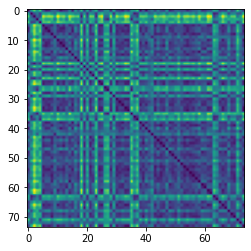

In [19]:
plt.imshow(Dsqr)

In [20]:
Dsqr.shape

(74, 74)

In [7]:
cell_mapped_types = TMG.map_to_cell_level(2)

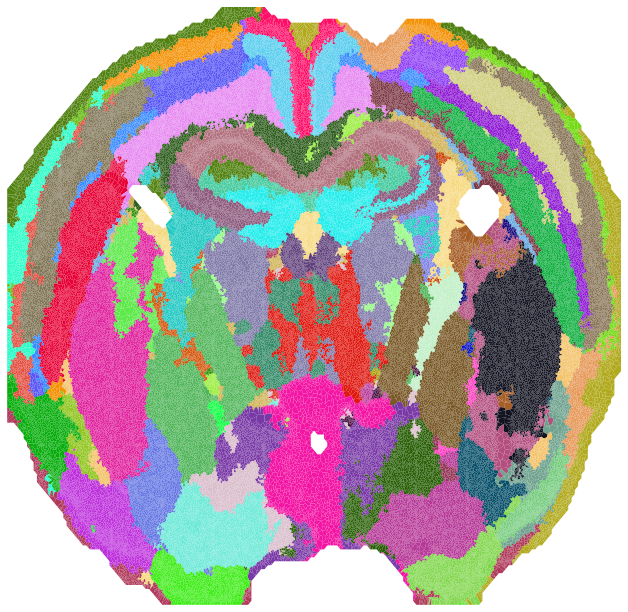

In [9]:
V = RandomColorpleth(TMG,id_vec = cell_mapped_types)
V.set_view()
V.plot()